In [2]:
%load_ext autoreload
%autoreload 2
#6, 1, 1, 12

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from IPython.display import HTML
HTML("<style>div.output_area pre { font-family: 'Courier New', monospace; }</style>")

In [2]:
from apad_env import APADEnv

False
2751
Invalid piece placement
row 6, dr 1, col 0, dc 0
piece_id, chirality, rotation, position (7, 1, 3, 42)


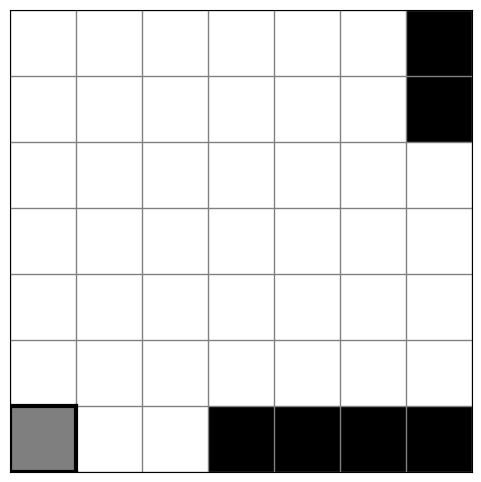

IndexError: 

In [13]:
env = APADEnv()
obs, _ = env.reset()
print(env._is_valid_placement(7, 0, 1, 13))
#print(env.encode_action(7,0,1,13))
print(env.encode_action(7,1,3,42))
env._place_piece(7, 1, 3, 42)
#env._place_piece(6, 0, 0, 1)
#env.visualize()

piece [(2, 0), (1, 0), (1, 1), (1, 2), (0, 2)]
location 1 5
False
Invalid piece placement
row 1, dr 1, col 5, dc 2
piece_id, chirality, rotation, position (7, 0, 1, 12)


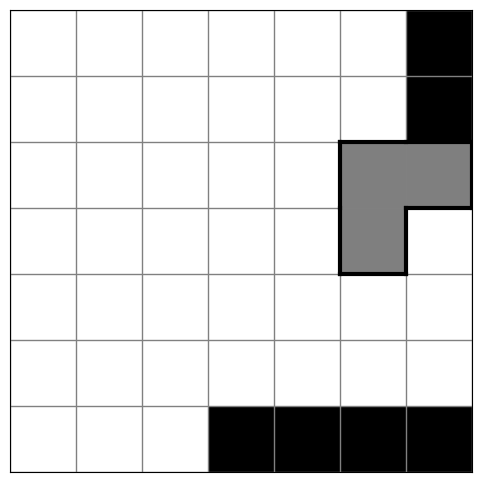

IndexError: 

In [24]:
env = APADEnv()
obs, _ = env.reset()
coords = env._get_piece_coords(7, 0, 1)
print("piece", coords)
row, col = divmod(12, env.grid_size)
print("location", row, col)
print(env._is_valid_placement(7, 0, 1, 12))
env._place_piece(7, 0, 1, 12)
#env._place_piece(6, 0, 0, 1)
print(env.grid)
env.visualize()